In [25]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

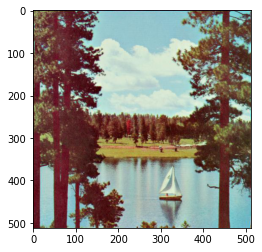

In [26]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [27]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    height = len(im[:,0,0])
    width = len(im[0,:,0])
    kernel = np.fliplr(kernel)
    kernel = np.flipud(kernel)
    im_r = im[:,:,0]
    im_g = im[:,:,1]
    im_b = im[:,:,2]
    im_r_conv = im[:,:,0]
    im_g_conv = im[:,:,1]
    im_b_conv = im[:,:,2]
    kernel_size = kernel.shape
    kernel_center = int(.5*(kernel_size[0]-1))

    for h in range(height-kernel_size[0]+1):
        for w in range(width-kernel_size[1]+1):
            sum_r = 0
            sum_g = 0
            sum_b = 0
            for hk in range(kernel_size[0]):
                for wk in range(kernel_size[1]):
                    sum_r += im_r[h+hk,w+wk]*kernel[hk,wk]
                    sum_g += im_g[h+hk,w+wk]*kernel[hk,wk]
                    sum_b += im_b[h+hk,w+wk]*kernel[hk,wk]
            im_r_conv[h,w] = sum_r
            im_g_conv[h,w] = sum_g
            im_b_conv[h, w] = sum_b
    im_conv = np.dstack((im_r_conv,im_g_conv, im_b_conv))
    assert len(im.shape) == 3
    return im_conv

In [28]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

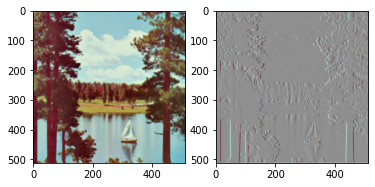

In [29]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()